In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)


In [3]:
BASE_PATH = "/content/drive/MyDrive/ds_manishankerreddy/"

df = pd.read_csv(
    BASE_PATH + "csv_files/processed_trader_sentiment_data.csv",
    parse_dates=['trade_date', 'Timestamp IST', 'date']
)

print(df.shape)
df.head()


(173532, 19)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,trade_date,date,sentiment
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,2024-12-02,greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,2024-12-02,greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,2024-12-02,greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,2024-12-02,greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,2024-12-02,greed


In [4]:
df['is_profitable'] = df['Closed PnL'] > 0

df[['Closed PnL', 'is_profitable']].head()


,Closed PnL,is_profitable
0,0.0,False
1,0.0,False
2,0.0,False
3,0.0,False
4,0.0,False


In [5]:
profit_summary = df.groupby('sentiment').agg(
    total_trades=('Closed PnL', 'count'),
    avg_pnl=('Closed PnL', 'mean'),
    median_pnl=('Closed PnL', 'median'),
    win_rate=('is_profitable', 'mean')
)

profit_summary


,total_trades,avg_pnl,median_pnl,win_rate
sentiment,,,,
fear,83237,49.212077,0.0,0.407871
greed,90295,53.882281,0.0,0.420311


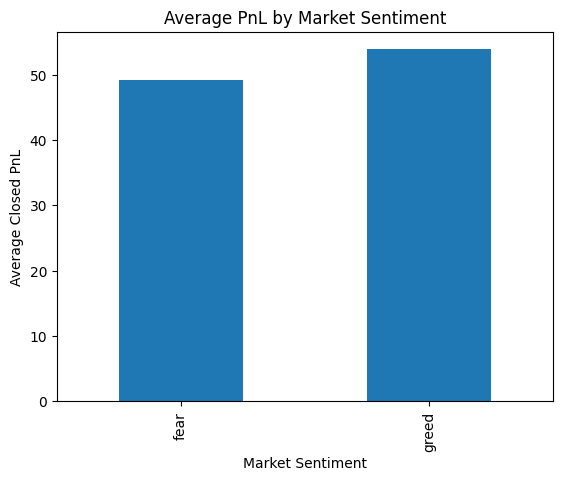

In [6]:
profit_summary['avg_pnl'].plot(kind='bar')
plt.title('Average PnL by Market Sentiment')
plt.ylabel('Average Closed PnL')
plt.xlabel('Market Sentiment')
plt.show()


In [7]:
risk_summary = df.groupby('sentiment').agg(
    avg_position_usd=('Size USD', 'mean'),
    median_position_usd=('Size USD', 'median')
)

risk_summary


,avg_position_usd,median_position_usd
sentiment,,
fear,7182.011019,749.4
greed,4574.424490,552.2


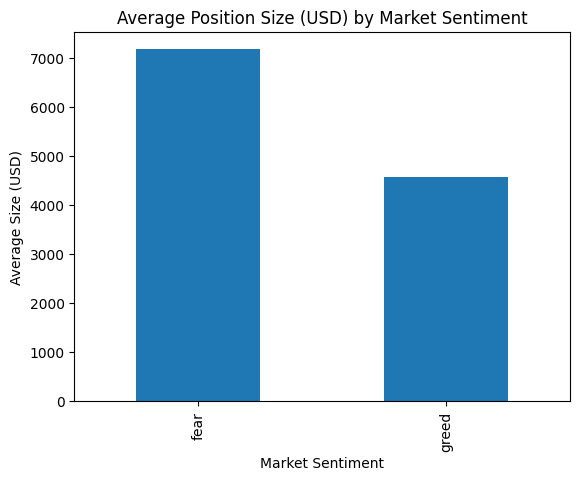

In [8]:
risk_summary['avg_position_usd'].plot(kind='bar')
plt.title('Average Position Size (USD) by Market Sentiment')
plt.ylabel('Average Size (USD)')
plt.xlabel('Market Sentiment')
plt.show()


In [9]:
risk_summary


,avg_position_usd,median_position_usd
sentiment,,
fear,7182.011019,749.4
greed,4574.424490,552.2


In [10]:
trade_count = df.groupby('sentiment').size()

trade_count


,0
sentiment,
fear,83237
greed,90295


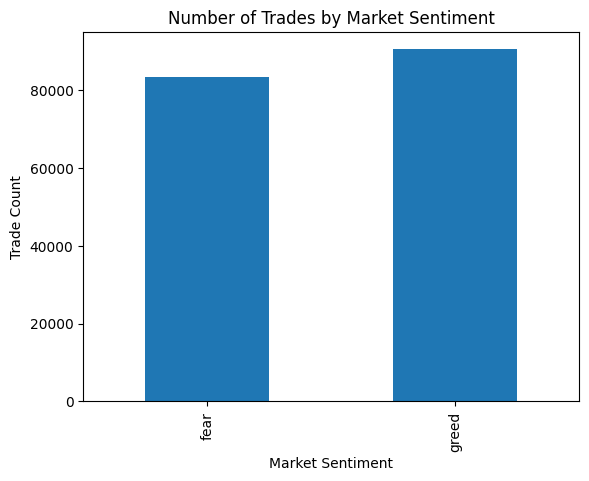

In [11]:
trade_count.plot(kind='bar')
plt.title('Number of Trades by Market Sentiment')
plt.ylabel('Trade Count')
plt.xlabel('Market Sentiment')
plt.show()


In [12]:
fee_summary = df.groupby('sentiment').agg(
    avg_fee=('Fee', 'mean'),
    total_fee=('Fee', 'sum')
)

fee_summary


,avg_fee,total_fee
sentiment,,
fear,1.397763,116345.582614
greed,0.998166,90129.357444


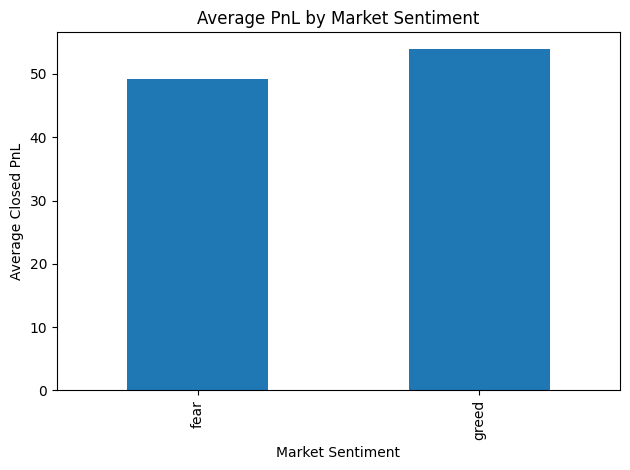

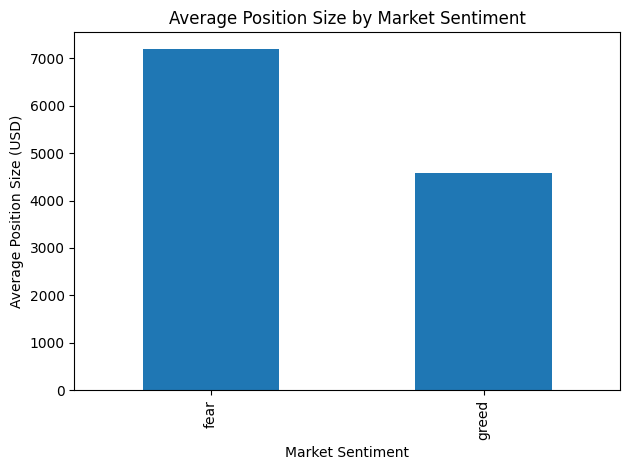

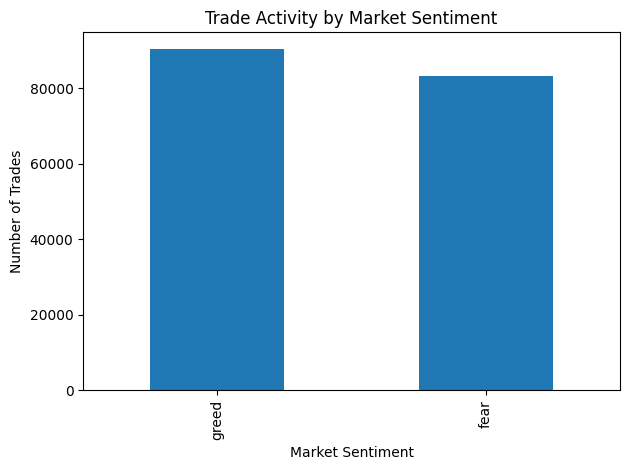

In [20]:
import os
import matplotlib.pyplot as plt


OUTPUT_DIR = BASE_PATH + "outputs/"
os.makedirs(OUTPUT_DIR, exist_ok=True)


avg_pnl = df.groupby("sentiment")["Closed PnL"].mean()

plt.figure()
avg_pnl.plot(kind="bar")
plt.title("Average PnL by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Average Closed PnL")
plt.tight_layout()
plt.show()

plt.figure()
avg_pnl.plot(kind="bar")
plt.title("Average PnL by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Average Closed PnL")
plt.tight_layout()
plt.savefig(OUTPUT_DIR + "avg_pnl_by_sentiment.png")
plt.close()



avg_position = df.groupby("sentiment")["Size USD"].mean()

plt.figure()
avg_position.plot(kind="bar")
plt.title("Average Position Size by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Average Position Size (USD)")
plt.tight_layout()
plt.show()

plt.figure()
avg_position.plot(kind="bar")
plt.title("Average Position Size by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Average Position Size (USD)")
plt.tight_layout()
plt.savefig(OUTPUT_DIR + "avg_position_size.png")
plt.close()


trade_activity = df["sentiment"].value_counts()

plt.figure()
trade_activity.plot(kind="bar")
plt.title("Trade Activity by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Number of Trades")
plt.tight_layout()
plt.show()

plt.figure()
trade_activity.plot(kind="bar")
plt.title("Trade Activity by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Number of Trades")
plt.tight_layout()
plt.savefig(OUTPUT_DIR + "trade_activity.png")
plt.close()

